# Bibliotecas

In [1]:
import pandas            as pd    # Biblioteca para trabajar con DataFrames
import numpy             as np    # Biblioteca para trabajar con àlgebra lineal
import matplotlib.pyplot as plt   # Biblioteca para realizar gràficas
import seaborn           as sns   # Biblioteca para realizar gráficas
import statsmodels.api   as sm    # Biblioteca para realizar algunos modelos estadisticos
import warnings                   # Biblioteca para manipular las alertas/mensajes

from   keras.models          import Sequential         # Un tipo de Modelo de una Red Neuronal
from   keras.layers          import Dense              # Un tipo de Capa de una Red Neuronal
from   keras.utils           import to_categorical     # Función para transformar nuestra variable respuesta
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder, StandardScaler
from   sklearn.metrics       import accuracy_score     # Función para calcular la precisión de clasificación
from   sklearn.metrics       import confusion_matrix   # Función para calcular una matriz de confusión

sns.set()
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [ ]:
# Si les marca error debido a que no tienen instalada la biblioteca 'keras'/'tensorflow'
# pueden correr el siguiente codigo
import sys
#!{sys.executable} -m pip install keras
#!{sys.executable} -m pip install tensorflow

# Perceptron

<img src="perceptron.png">

La salida $y$ (para el caso de tener solamente 2 posibles resultados) la podemos definir de la siguiente manera:

$$y = \begin{cases}
1 & \text{Si } \ w \cdot x > u \\
0 & \text{Si } \ w \cdot x \leq u \\
\end{cases} = \begin{cases}
1 & \text{Si } \ w \cdot x - u > 0 \\
0 & \text{Si } \ w \cdot x - u \leq 0 \\
\end{cases}$$

Donde
- $w$ es un vector de pesos/ponderadores.
- $x$ es un vector con los datos de entrada.
- $w \cdot x$ es el producto punto o escalar donde ponderamos las entradas.
- $u$ es el umbral ('threshold'), el cual representa el grado de inhibición de la neurona. 

Lo mas dificil de comprender en las redes neuronales es justamente el comportamiento de los pesos y cómo estos se van modificando para dar lugar a un resultado óptimo. A continuación, mostramos un ejemplo sencillo de cómo es que va 'aprendiendo' el modelo y de esa manera ajusta los pesos para obtener mejores precisiones.

In [69]:
matriz_diseño = np.array( [ [1, 0, 0],
                            [1, 0, 1],
                            [1, 1, 0],
                            [1, 1, 1] ] )
y_real        = np.array( [1,1,1,0] )

print("Matriz Diseño")
print(matriz_diseño)
print("Y Real")
print(y_real)

Matriz Diseño
[[1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
Y Real
[1 1 1 0]


In [87]:
################################################################################
# Parametros y funciones necesarias 
################################################################################
umbral              = 0.50    # Limite para determinar una clase
ponderadores        = [0,0,0] # Los ponderadores es por cada covariable (cada columna de la mat. de diseño)
tasa_de_aprendizaje = 0.10    # Tasa con la que aprendera más rápido o lento el algoritmo

# Definimos una funcion de producto punto
def producto_punto(valores, pesos):
    return sum(valor * peso for valor, peso in zip(valores, pesos))

################################################################################
# Algoritmo de aprendizaje (determinar los ponderadores óptimos)
################################################################################
iteracion = 1
while True:
    print("")
    print("Iteracion :: ", iteracion )
    print("-"*80)
    iteracion += 1 # Esto es lo mismo que "iteracion = iteracion + 1"
    
    # Recorremos todos los registros para determinar la precision del modelo
    contador_de_errores = 0
    registro_a_procesar = 1
    for vector_de_entrada, y_verdadera in zip(matriz_diseño, y_real):
        print("Ponderadores del registro " + str(registro_a_procesar) + " :: ", ponderadores)
        registro_a_procesar += 1 
        # Estimamos y comparamos si coincidimos o no
        y_estimada = producto_punto(vector_de_entrada, ponderadores) > umbral
        error      = y_verdadera - y_estimada
        # En caso de que hayamos 'fallado', entonces ajustamos los ponderadores 
        # de tal manera que nos 'acerquemos' al valor deseado
        if error != 0:
            contador_de_errores += 1 # contador_de_errores = contador_de_errores + 1
            for indice, valor in enumerate(vector_de_entrada):
                ponderadores[indice] += tasa_de_aprendizaje * error * valor

    # En este paso, ya recorrimos todos los registros
    # En el caso en que ya tuvimos una precisión del 100% (nunca tuvimos ningun error)
    # entonces nos salimos del proceso para seguir ajustando los ponderadores
    if contador_de_errores == 0:
        break


Iteracion ::  1
--------------------------------------------------------------------------------
Ponderadores del registro 1 ::  [0, 0, 0]
Ponderadores del registro 2 ::  [0.1, 0.0, 0.0]
Ponderadores del registro 3 ::  [0.2, 0.0, 0.1]
Ponderadores del registro 4 ::  [0.30000000000000004, 0.1, 0.1]

Iteracion ::  2
--------------------------------------------------------------------------------
Ponderadores del registro 1 ::  [0.30000000000000004, 0.1, 0.1]
Ponderadores del registro 2 ::  [0.4, 0.1, 0.1]
Ponderadores del registro 3 ::  [0.5, 0.1, 0.2]
Ponderadores del registro 4 ::  [0.5, 0.1, 0.2]

Iteracion ::  3
--------------------------------------------------------------------------------
Ponderadores del registro 1 ::  [0.4, 0.0, 0.1]
Ponderadores del registro 2 ::  [0.5, 0.0, 0.1]
Ponderadores del registro 3 ::  [0.5, 0.0, 0.1]
Ponderadores del registro 4 ::  [0.6, 0.1, 0.1]

Iteracion ::  4
--------------------------------------------------------------------------------
Ponder

En el ejemplo anterior debemos destacar cómo medimos dicho 'error'. Es decir, ¿Qué tanto estamos difiriendo/distanciandonos del valor deseado?

Además, los datos permitieron que encontraramos un cierto conjunto de tal que obtener un error = 0 para todos los registros. Sin embargo, en la práctica esto no siempre es posible.

Finalmente, también juegan papeles importantes tanto el umbral como la tasa de aprendizaje.
El umbral nos ayuda a discriminar entre las categorias mientras que la tasa de aprendizaje puede ayudarnos a disminuir las iteraciones necesarias para encontrar el conjunto de ponderadores que necesitamos, o en caso contrario, perjudicarnos para tal vez nunca converger a cierto conjunto de ponderadores.

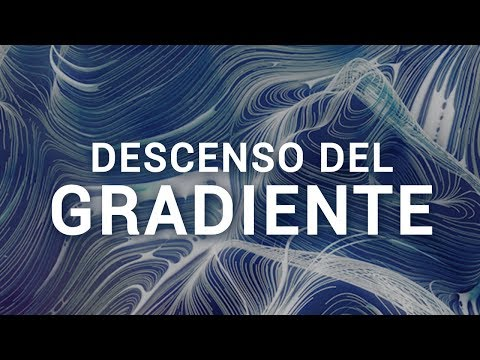

In [90]:
from IPython.display import YouTubeVideo
YouTubeVideo('A6FiCDoz8_4')

# https://www.youtube.com/watch?v=A6FiCDoz8_4
# CANAL :: Dot CSV

# Ejemplo :: Iris

In [33]:
# Fijamos una semilla para reproducir el codigo y leemos los datos
np.random.seed(1)
datos_iris = pd.read_csv(filepath_or_buffer = "iris.csv", delimiter = ",")
datos_iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


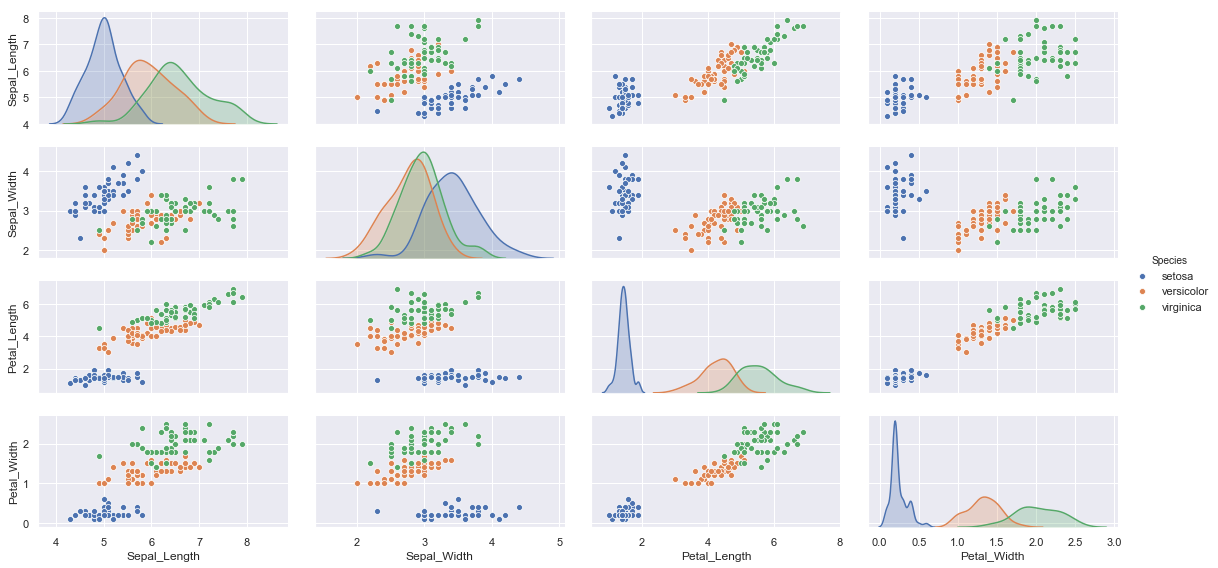

In [67]:
sns.pairplot(data = datos_iris,hue = "Species", height = 2, aspect = 2)
plt.show()

### 1) Preparación de los datos

In [54]:
#############################################################################
# Separamos nuestros datos como son
#############################################################################
matriz_diseño = datos_iris.iloc[:,0:4].values
y_real        = datos_iris.iloc[:,4].values

print("DATOS INICIALES ----------------------")
print("Matriz de diseño:")
print(matriz_diseño[0:5])
print("")
print("Y Real")
print(y_real[0:5])

#############################################################################
# Sin embargo, los datos de respuesta (la especia) es texto, por lo que
# codificaremos los datos una clasificación binari
#############################################################################
codificador_species = LabelEncoder().fit(y_real)
print("")
print("Datos codificados de 'Species' ")
for texto, valor in zip( codificador_species.classes_, codificador_species.transform( codificador_species.classes_ ) ):
    print( "{:12}".format( str(texto) ) , " -> ", valor )

#y_real = [ 1 if x == "setosa" else 0 for x in y_real ]
#y_real = [ 1 if x == "versicolor" else 0 for x in y_real ]
y_real = [ 1 if x == "virginica" else 0 for x in y_real ]
#y_real = codificador_species.transform( y_real )

print("")
print("DATOS CODIFICADOS ----------------------")
print("Matriz de diseño:")
print(matriz_diseño[0:5])
print("")
print("Y Real")
print(y_real[0:5])

DATOS INICIALES ----------------------
Matriz de diseño:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Y Real
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']

Datos codificados de 'Species' 
setosa        ->  0
versicolor    ->  1
virginica     ->  2

DATOS CODIFICADOS ----------------------
Matriz de diseño:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Y Real
[0, 0, 0, 0, 0]


### 2) Creación del modelo

In [57]:
#############################################################################
# Generamos nuestro modelo de redneuronal
#############################################################################
modelo_redneuronal = Sequential(layers=None, name=None)

#############################################################################
# Agregamos algunas capas
#############################################################################
modelo_redneuronal.add( Dense(output_dim = 10, init = 'uniform', activation='relu', input_dim=4 ) )
modelo_redneuronal.add( Dense(output_dim = 1,  init = 'uniform', activation='sigmoid') )

#############################################################################
# Unimos todo el modelo
#############################################################################
# El primer parámetro 'optimizer' es el método para encontrar los pesos w_i adecuados para la red neuronal
# optimizer = "adam" (Descenso de Gradiente Estocástico) 

# El segundo parámetro 'loss' es el función de pérdida
# https://keras.io/losses/
# loss = "binary_crossentropy"              para clasificación de dos clases
# loss = "categorical_crossentropy"         para clasificación de más de dos clases
# loss = "sparse_categorical_crossentropy"
# loss = "kullback_leibler_divergence"

# El tercer parámetro 'metrics' es una lista con las métricas que se desean monitorear
modelo_redneuronal.compile(optimizer="adam",loss="binary_crossentropy", metrics=["accuracy"] )
#modelo_redneuronal.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

#############################################################################
# Ajustamos el modelo
#############################################################################
# https://medium.com/@aabraahaam/introducci%C3%B3n-a-las-redes-neuronales-con-python-utilizando-keras-63991e1a969d
# https://unipython.com/desarrolla-primera-red-neural-python-keras-paso-paso/
# http://www.clubdetecnologia.net/blog/2017/python-como-construir-una-red-neuronal-simple/
# http://www.aprendemachinelearning.com/una-sencilla-red-neuronal-en-python-con-keras-y-tensorflow/
# http://www.aprendemachinelearning.com/crear-una-red-neuronal-en-python-desde-cero/

# Ajustamos el modelo, aquí es donde se encuentran los pesos óptimos para la red neuronal

# Parámetros
# 'epochs'     = número de iteraciones que realizaremos
# 'batch_size' = número de observaciones que la red necesita entrenar antes de actualizar los pesos
modelo_redneuronal.fit(matriz_diseño, y_real, epochs=500, batch_size=150  )

Epoch 1/500
150/150 [==============================] - 1s 4ms/step - loss: 0.6935 - acc: 0.3333
Epoch 2/500
150/150 [==============================] - 0s 0us/step - loss: 0.6932 - acc: 0.3333
Epoch 3/500
150/150 [==============================] - 0s 0us/step - loss: 0.6929 - acc: 0.3333
Epoch 4/500
150/150 [==============================] - 0s 104us/step - loss: 0.6925 - acc: 0.6667
Epoch 5/500
150/150 [==============================] - 0s 0us/step - loss: 0.6922 - acc: 0.6667
Epoch 6/500
150/150 [==============================] - 0s 0us/step - loss: 0.6918 - acc: 0.6933
Epoch 7/500
150/150 [==============================] - 0s 104us/step - loss: 0.6915 - acc: 0.7667
Epoch 8/500
150/150 [==============================] - 0s 0us/step - loss: 0.6911 - acc: 0.9267
Epoch 9/500
150/150 [==============================] - 0s 104us/step - loss: 0.6907 - acc: 0.9800
Epoch 10/500
150/150 [==============================] - 0s 0us/step - loss: 0.6903 - acc: 0.9400
Epoch 11/500
150/150 [===========

Epoch 85/500
150/150 [==============================] - 0s 104us/step - loss: 0.6305 - acc: 0.6733
Epoch 86/500
150/150 [==============================] - 0s 104us/step - loss: 0.6291 - acc: 0.6733
Epoch 87/500
150/150 [==============================] - 0s 0us/step - loss: 0.6276 - acc: 0.6733
Epoch 88/500
150/150 [==============================] - 0s 0us/step - loss: 0.6262 - acc: 0.6800
Epoch 89/500
150/150 [==============================] - 0s 0us/step - loss: 0.6247 - acc: 0.6800
Epoch 90/500
150/150 [==============================] - 0s 0us/step - loss: 0.6232 - acc: 0.6800
Epoch 91/500
150/150 [==============================] - 0s 0us/step - loss: 0.6216 - acc: 0.6800
Epoch 92/500
150/150 [==============================] - 0s 104us/step - loss: 0.6201 - acc: 0.6867
Epoch 93/500
150/150 [==============================] - 0s 0us/step - loss: 0.6185 - acc: 0.6867
Epoch 94/500
150/150 [==============================] - 0s 0us/step - loss: 0.6170 - acc: 0.6933
Epoch 95/500
150/150 [==

Epoch 169/500
150/150 [==============================] - 0s 0us/step - loss: 0.4785 - acc: 0.9800
Epoch 170/500
150/150 [==============================] - 0s 0us/step - loss: 0.4767 - acc: 0.9800
Epoch 171/500
150/150 [==============================] - 0s 0us/step - loss: 0.4749 - acc: 0.9800
Epoch 172/500
150/150 [==============================] - 0s 0us/step - loss: 0.4732 - acc: 0.9800
Epoch 173/500
150/150 [==============================] - 0s 104us/step - loss: 0.4714 - acc: 0.9800
Epoch 174/500
150/150 [==============================] - 0s 0us/step - loss: 0.4697 - acc: 0.9800
Epoch 175/500
150/150 [==============================] - 0s 0us/step - loss: 0.4680 - acc: 0.9800
Epoch 176/500
150/150 [==============================] - 0s 104us/step - loss: 0.4663 - acc: 0.9800
Epoch 177/500
150/150 [==============================] - 0s 0us/step - loss: 0.4645 - acc: 0.9800
Epoch 178/500
150/150 [==============================] - 0s 0us/step - loss: 0.4629 - acc: 0.9800
Epoch 179/500
15

Epoch 253/500
150/150 [==============================] - 0s 0us/step - loss: 0.3628 - acc: 0.9733
Epoch 254/500
150/150 [==============================] - 0s 0us/step - loss: 0.3618 - acc: 0.9733
Epoch 255/500
150/150 [==============================] - 0s 0us/step - loss: 0.3608 - acc: 0.9733
Epoch 256/500
150/150 [==============================] - 0s 0us/step - loss: 0.3598 - acc: 0.9733
Epoch 257/500
150/150 [==============================] - 0s 0us/step - loss: 0.3588 - acc: 0.9733
Epoch 258/500
150/150 [==============================] - 0s 0us/step - loss: 0.3578 - acc: 0.9733
Epoch 259/500
150/150 [==============================] - 0s 0us/step - loss: 0.3568 - acc: 0.9733
Epoch 260/500
150/150 [==============================] - 0s 104us/step - loss: 0.3558 - acc: 0.9733
Epoch 261/500
150/150 [==============================] - 0s 0us/step - loss: 0.3548 - acc: 0.9733
Epoch 262/500
150/150 [==============================] - 0s 0us/step - loss: 0.3538 - acc: 0.9733
Epoch 263/500
150/

Epoch 337/500
150/150 [==============================] - 0s 0us/step - loss: 0.2907 - acc: 0.9733
Epoch 338/500
150/150 [==============================] - 0s 0us/step - loss: 0.2900 - acc: 0.9733
Epoch 339/500
150/150 [==============================] - 0s 0us/step - loss: 0.2892 - acc: 0.9733
Epoch 340/500
150/150 [==============================] - 0s 0us/step - loss: 0.2885 - acc: 0.9733
Epoch 341/500
150/150 [==============================] - 0s 0us/step - loss: 0.2878 - acc: 0.9733
Epoch 342/500
150/150 [==============================] - 0s 104us/step - loss: 0.2870 - acc: 0.9733
Epoch 343/500
150/150 [==============================] - 0s 0us/step - loss: 0.2863 - acc: 0.9733
Epoch 344/500
150/150 [==============================] - 0s 104us/step - loss: 0.2856 - acc: 0.9733
Epoch 345/500
150/150 [==============================] - 0s 0us/step - loss: 0.2849 - acc: 0.9733
Epoch 346/500
150/150 [==============================] - 0s 104us/step - loss: 0.2842 - acc: 0.9733
Epoch 347/500


Epoch 421/500
150/150 [==============================] - 0s 104us/step - loss: 0.2367 - acc: 0.9733
Epoch 422/500
150/150 [==============================] - 0s 0us/step - loss: 0.2361 - acc: 0.9733
Epoch 423/500
150/150 [==============================] - 0s 0us/step - loss: 0.2356 - acc: 0.9733
Epoch 424/500
150/150 [==============================] - 0s 104us/step - loss: 0.2350 - acc: 0.9733
Epoch 425/500
150/150 [==============================] - 0s 0us/step - loss: 0.2345 - acc: 0.9733
Epoch 426/500
150/150 [==============================] - 0s 0us/step - loss: 0.2339 - acc: 0.9733
Epoch 427/500
150/150 [==============================] - 0s 0us/step - loss: 0.2334 - acc: 0.9733
Epoch 428/500
150/150 [==============================] - 0s 0us/step - loss: 0.2329 - acc: 0.9733
Epoch 429/500
150/150 [==============================] - 0s 104us/step - loss: 0.2323 - acc: 0.9733
Epoch 430/500
150/150 [==============================] - 0s 0us/step - loss: 0.2318 - acc: 0.9733
Epoch 431/500


### 3) Evaluación del modelo

In [58]:
#############################################################################
# Clasificamos nuestros datos
#############################################################################
# La función 'predict' no devuelve la clase a la que pertenece la observación.
# Devuelve la probailidad de pertenecer a una clase.
# Como el modelo es binario, simplemente nos da la probabilidad de ser que y_real = 1
y_estimada = modelo_redneuronal.predict( matriz_diseño )
print( y_estimada[0:5] )

print("")
# Si deseamos que nos devuelva la clase, debemos usar 'predict_classes'
y_estimada = modelo_redneuronal.predict_classes( matriz_diseño )
print( y_estimada[0:5] )


#############################################################################
# Por el metodo de 'accuracy_score'
#############################################################################
print("")
print(" METODO :: 'accuracy_score' ")
print( "Precision del modelo = " + str( np.round( accuracy_score( y_real, y_estimada ) * 100, 2 ) ) + "%" )


#############################################################################
# Por el método de matriz de confusión
#############################################################################
print("")
print(" METODO :: 'Matriz de confusión' ")
matriz_confusion = confusion_matrix(y_real, y_estimada)
print( matriz_confusion ) 
print( "Precision del modelo = ", 100 * ( matriz_confusion[0,0] + matriz_confusion[1,1] ) / np.sum( matriz_confusion ), "%")


#############################################################################
# Por el método propio del modelo
#############################################################################
print("")
print(" METODO :: 'evaluate' ")
# Regresa al menos 2 cosas
# 1) El valor de la función de pérdida (loss value). En este ejemplo, el valor de 'binary_crossentropy'
# 2) El valor de la métrica que solicitamos. En este ejemplo, solicitamos 'accuracy' que es justo la precisión.
# 
# Si al momento de 'compilar' todo el modelo le indicamos que deseamos más metricas, estas también se calculan
resultados_metricas = modelo_redneuronal.evaluate(matriz_diseño, y_real)
for nombre, resultado in zip( modelo_redneuronal.metrics_names, resultados_metricas ):
    print("{:8}".format(nombre), "=", resultado)

[[0.00426659]
 [0.00685182]
 [0.00629899]
 [0.00866553]
 [0.00428188]]

[[0]
 [0]
 [0]
 [0]
 [0]]

 METODO :: 'accuracy_score' 
Precision del modelo = 98.0%

 METODO :: 'Matriz de confusión' 
[[97  3]
 [ 0 50]]
Precision del modelo =  98.0 %

 METODO :: 'evaluate' 
150/150 [==============================] - 0s 728us/step
loss     = 0.19836538275082907
acc      = 0.98


# Ejemplo :: Churn Modelling

In [2]:
# Fijamos una semilla para reproducir el codigo y leemos los datos
np.random.seed(1)
datos_churn = pd.read_csv(filepath_or_buffer = "churn_modelling.csv", delimiter = ",")
datos_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
sns.pairplot(data = datos_churn,hue = "Exited", height = 2, aspect = 2)
plt.show()

NameError: name 'datos_churn' is not defined

### 1) Preparación de los datos

In [6]:
#############################################################################
# Separamos nuestros datos como son
#############################################################################
matriz_diseño = datos_churn.iloc[:,3:13].values
y_real        = datos_churn.iloc[:,13].values

print("DATOS INICIALES ----------------------")
print("Matriz de diseño:")
print(matriz_diseño[0:5])
print("")
print("Y Real")
print(y_real[0:5])

#############################################################################
# Sin embargo, los datos deben ser numericos, por lo tanto,
# codificamos las columnas 'Geography' y 'Gender'
#############################################################################
codificador_geography = LabelEncoder().fit(matriz_diseño[:, 1])
codificador_gender    = LabelEncoder().fit(matriz_diseño[:, 2])
print("")
print("Datos codificados de 'Geography' ")
for texto, valor in zip( codificador_geography.classes_, codificador_geography.transform( codificador_geography.classes_ ) ):
    print( "{:8}".format( str(texto) ) , " -> ", valor )

print("")
print("Datos codificados de 'Gender' ")
for texto, valor in zip( codificador_gender.classes_, codificador_gender.transform( codificador_gender.classes_ ) ):
    print( "{:8}".format( str(texto) ) , " -> ", valor )

matriz_diseño[:, 1]   = codificador_geography.transform(matriz_diseño[:, 1])
matriz_diseño[:, 2]   = codificador_gender.transform(   matriz_diseño[:, 2])

print("")
print("DATOS CODIFICADOS ----------------------")
print("Matriz de diseño:")
print(matriz_diseño[0:5])
print("")
print("Y Real")
print(y_real[0:5])

#############################################################################
# Pasamos los datos categoricos a columnas
#############################################################################
codificador_hot = OneHotEncoder(categorical_features = [1])
matriz_diseño   = codificador_hot.fit_transform(matriz_diseño).toarray()
matriz_diseño   = matriz_diseño[:, 1:]

print("")
print("DATOS TRANSFORMADOS A COLUMNAS --------")
print("Matriz de diseño:")
print(matriz_diseño[0:5])
print("")
print("Y Real")
print(y_real[0:5])

#############################################################################
# Escalamos los datos
#############################################################################
escalador = StandardScaler()
matriz_diseño   = escalador.fit_transform(matriz_diseño)

print("")
print("DATOS ESCALADOS ----------------------")
print("Matriz de diseño:")
print(matriz_diseño[0:5])
print("")
print("Y Real")
print(y_real[0:5])

DATOS INICIALES ----------------------
Matriz de diseño:
[[619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
 [608 'Spain' 'Female' 41 1 83807.86 1 0 1 112542.58]
 [502 'France' 'Female' 42 8 159660.8 3 1 0 113931.57]
 [699 'France' 'Female' 39 1 0.0 2 0 0 93826.63]
 [850 'Spain' 'Female' 43 2 125510.82 1 1 1 79084.1]]

Y Real
[1 0 1 0 0]

Datos codificados de 'Geography' 
France    ->  0
Germany   ->  1
Spain     ->  2

Datos codificados de 'Gender' 
Female    ->  0
Male      ->  1

DATOS CODIFICADOS ----------------------
Matriz de diseño:
[[619 0 0 42 2 0.0 1 1 1 101348.88]
 [608 2 0 41 1 83807.86 1 0 1 112542.58]
 [502 0 0 42 8 159660.8 3 1 0 113931.57]
 [699 0 0 39 1 0.0 2 0 0 93826.63]
 [850 2 0 43 2 125510.82 1 1 1 79084.1]]

Y Real
[1 0 1 0 0]

DATOS TRANSFORMADOS A COLUMNAS --------
Matriz de diseño:
[[0.0000000e+00 0.0000000e+00 6.1900000e+02 0.0000000e+00 4.2000000e+01
  2.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0134888e+05]
 [0.0000000e+00 1.00

### 2) Creación del modelo

In [8]:
#############################################################################
# Generamos nuestro modelo de redneuronal
#############################################################################
modelo_redneuronal = Sequential(layers=None, name=None)

#############################################################################
# Agregamos algunas capas
#############################################################################
modelo_redneuronal.add( Dense(output_dim = 12, init = 'uniform', activation='relu', input_dim=11 ) )
modelo_redneuronal.add( Dense(output_dim = 8,  init = 'uniform', activation='relu') )
modelo_redneuronal.add( Dense(output_dim = 1,  init = 'uniform', activation='sigmoid') )

#############################################################################
# Unimos todo el modelo
#############################################################################
# El primer parámetro 'optimizer' es el método para encontrar los pesos w_i adecuados para la red neuronal
# optimizer = "adam" (Descenso de Gradiente Estocástico) 

# El segundo parámetro 'loss' es el función de pérdida
# https://keras.io/losses/
# loss = "binary_crossentropy"              para clasificación de dos clases
# loss = "categorical_crossentropy"         para clasificación de más de dos clases
# loss = "sparse_categorical_crossentropy"
# loss = "kullback_leibler_divergence"

# El tercer parámetro 'metrics' es una lista con las métricas que se desean monitorear
modelo_redneuronal.compile(optimizer="adam",loss="binary_crossentropy", metrics=["accuracy"] )
#modelo_redneuronal.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

#############################################################################
# Ajustamos el modelo
#############################################################################
# https://medium.com/@aabraahaam/introducci%C3%B3n-a-las-redes-neuronales-con-python-utilizando-keras-63991e1a969d
# https://unipython.com/desarrolla-primera-red-neural-python-keras-paso-paso/
# http://www.clubdetecnologia.net/blog/2017/python-como-construir-una-red-neuronal-simple/
# http://www.aprendemachinelearning.com/una-sencilla-red-neuronal-en-python-con-keras-y-tensorflow/
# http://www.aprendemachinelearning.com/crear-una-red-neuronal-en-python-desde-cero/

# Ajustamos el modelo, aquí es donde se encuentran los pesos óptimos para la red neuronal

# Parámetros
# 'epochs'     = número de iteraciones que realizaremos
# 'batch_size' = número de observaciones que la red necesita entrenar antes de actualizar los pesos
modelo_redneuronal.fit(matriz_diseño, y_real, epochs=15, batch_size=5  )

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
10000/10000 [==============================] - 2s 178us/step - loss: 0.4476 - acc: 0.7958
Epoch 2/15
10000/10000 [==============================] - 1s 150us/step - loss: 0.4188 - acc: 0.8182
Epoch 3/15
10000/10000 [==============================] - 1s 139us/step - loss: 0.4142 - acc: 0.8322
Epoch 4/15
10000/10000 [==============================] - 1s 142us/step - loss: 0.4119 - acc: 0.8330
Epoch 5/15
10000/10000 [==============================] - 1s 139us/step - loss: 0.4087 - acc: 0.8362
Epoch 6/15
10000/10000 [==============================] - 1s 139us/step - loss: 0.4078 - acc: 0.8332
Epoch 7/15
10000/10000 [==============================] - 2s 159us/step - loss: 0.4066 - acc: 0.8338
Epoch 8/15
10000/10000 [==============================] - 2s 189us/step - loss: 0.4056 - acc: 0.8364
Epoch 9/15
10000/10000 [==============================] - 2s 189us/step - loss: 0.4043 - acc: 0.8356
Epoch 10/15
10000/10000 [==================

### 3) Evaluación del modelo

In [14]:
#############################################################################
# Clasificamos nuestros datos
#############################################################################
# La función 'predict' no devuelve la clase a la que pertenece la observación.
# Devuelve la probailidad de pertenecer a una clase.
# Como el modelo es binario, simplemente nos da la probabilidad de ser que y_real = 1
y_estimada = modelo_redneuronal.predict( matriz_diseño )
print( y_estimada[0:5] )

print("")
# Si deseamos que nos devuelva la clase, debemos usar 'predict_classes'
y_estimada = modelo_redneuronal.predict_classes( matriz_diseño )
print( y_estimada[0:5] )

#############################################################################
# Por el metodo de 'accuracy_score'
#############################################################################
print(" METODO :: 'accuracy_score' ")
print( "Precision del modelo = " + str( np.round( accuracy_score( y_real, y_estimada ) * 100, 2 ) ) + "%" )


#############################################################################
# Por el método de matriz de confusión
#############################################################################
print("")
print(" METODO :: 'Matriz de confusión' ")
matriz_confusion = confusion_matrix(y_real, y_estimada)
print( matriz_confusion ) 
print( "Precision del modelo = ", 100 * ( matriz_confusion[0,0] + matriz_confusion[1,1] ) / np.sum( matriz_confusion ), "%")


#############################################################################
# Por el método propio del modelo
#############################################################################
print("")
print(" METODO :: 'evaluate' ")
# Regresa al menos 2 cosas
# 1) El valor de la función de pérdida (loss value). En este ejemplo, el valor de 'binary_crossentropy'
# 2) El valor de la métrica que solicitamos. En este ejemplo, solicitamos 'accuracy' que es justo la precisión.
# 
# Si al momento de 'compilar' todo el modelo le indicamos que deseamos más metricas, estas también se calculan
resultados_metricas = modelo_redneuronal.evaluate(matriz_diseño, y_real)
for nombre, resultado in zip( modelo_redneuronal.metrics_names, resultados_metricas ):
    print("{:8}".format(nombre), "=", resultado)

[[0.18229213]
 [0.23815635]
 [0.35678366]
 [0.19708714]
 [0.18294197]]

[[0]
 [0]
 [0]
 [0]
 [0]]
